In [118]:
from loaders import *
from collections import Counter
import matplotlib.pylab as plt
import sys

In [119]:
optfname = 'options'
d = load_options(optfname)
X_train,X_test = get_list(d)

ofname = "{}{}-{}".format(d["OUTPUT_LOC"], "example", d["CORE_NAME"])
logfname = ofname + ".log"
flog('example.py' + " " + 'options', logfname, logtime=1)
flog(repr(d), logfname)

In [120]:
def load_cell(fname, time=0, ext=".cell"):
    #time = 0 means don't load packet times (saves time and memory)
    data = []
    time_stamp = []
    starttime = -1
    try:
        f = open(fname, "r")
        lines = f.readlines()
        f.close()

        if ext == ".htor":
            #htor actually loads into a cell format
            for li in lines:
                psize = 0
                if "INCOMING" in li:
                    psize = -1
                if "OUTGOING" in li:
                    psize = 1
                if psize != 0:
                    if time == 0:
                        data.append(psize)
                    if time == 1:
                        time = float(li.split(" ")[0])
                        if (starttime == -1):
                            starttime = time
                        data.append([time - starttime, psize])

        if ext == ".cell":
            for li in lines:
                li = li.split("\t")
                p = int(li[1])
                time_stamp.append(li[0])
                if time == 0:
                    data.append(p)
                if time == 1:
                    t = float(li[0])
                    if (starttime == -1):
                        starttime = t
                    data.append([t-starttime, p])
        if ext == ".burst":
            #data is like: 1,1,1,-1,-1\n1,1,1,1,-1,-1,-1
            for li in lines:
                burst = [0, 0]
                li = li.split(",")
                data.append([li.count("1"), li.count("-1")])
                for l in li:
                    if l == "1":
                        burst[0] += 1
                    if l == "-1":
                        burst[1] += 1
                data.append(burst)

        if ext == ".pairs":
            #data is like: [[3, 12], [1, 24]]
            #not truly implemented
            data = list(lines[0])            
    except:
        print "Could not load", fname
        sys.exit(-1)
    return time_stamp,data


def seq_graph(names,nums):
    plt.clf()
    plt.rcParams['figure.figsize'] = (18.0, 5.0)
    fit,axs = plt.subplots(1,nums)
    times = []
    for i in range(nums):
        io = []
        io_in = []
        io_out = []
        x_time,x_data = load_cell(names[i])
        times.append(x_time[-1])
        for k,j in zip(x_time,x_data):
            io.append(int(float(k)))
            if j<0:
                io_in.append(int(float(k)))
            else:
                io_out.append(int(float(k)))
        res = Counter(io)
        res_in = Counter(io_in)
        res_out = Counter(io_out)
        x = res.keys()
        y = res.values() 
        x_in = res_in.keys()
        y_in = res_in.values()            #plt.plot(x,y)
        x_out = res_out.keys()
        y_out = res_out.values()
        axs[i].plot(x,y,c='g')
        axs[i].bar(x_in,y_in)
        axs[i].bar(x_out,y_out)
        axs[i].axis('off')
    times_flo=[]
    for i in times:
        times_flo.append(float(i))
    #print io_in
    #print io_out
    print 'graph:' + names[0] + '---->' + names[nums] 
    print 'load time::: min:{}, max:{}, avg:{}'.format(min(times_flo),max(times_flo),sum(times_flo)/nums)

graph:../data/walkiebatch/0-1.cell---->../data/walkiebatch/0-6.cell
load time::: min:6.92148590088, max:17.0479209423, avg:11.5255119801


<Figure size 1296x360 with 0 Axes>

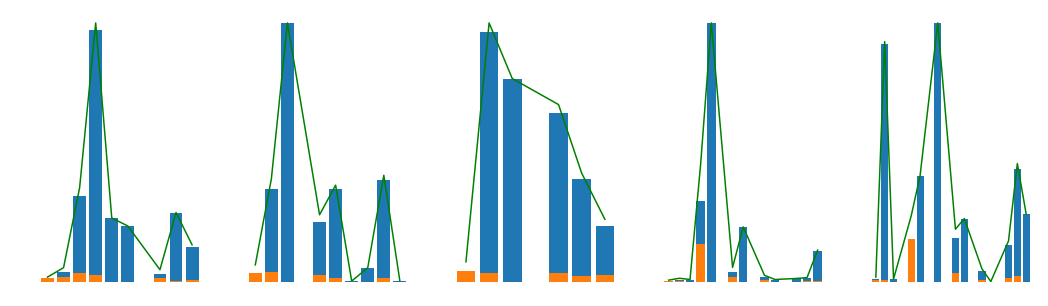

In [121]:
seq_graph(X_train[0],5)

graph:../data/walkiebatch/1-1.cell---->../data/walkiebatch/1-6.cell
load time::: min:7.47133898735, max:29.4798660278, avg:16.6399869919


<Figure size 1296x360 with 0 Axes>

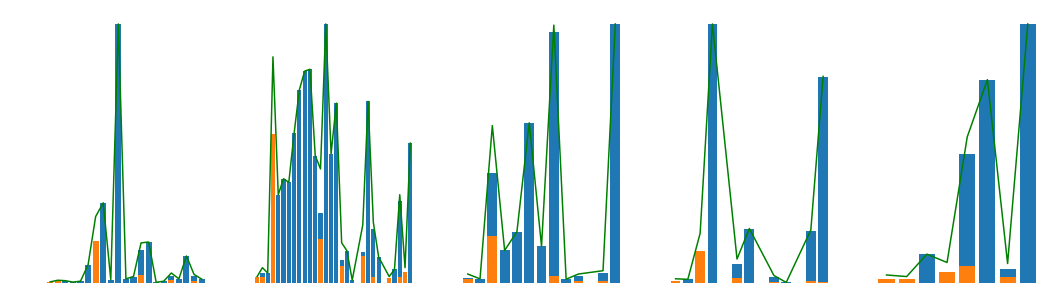

In [122]:
seq_graph(X_train[1],5)

In [126]:
import dill
def extract_dill(trainnames, testnames, ofname):  #for walkiebatch dateset for now
    '''Extract Features -- A dictionary containing features for each traffic instance.'''

    data_dict = {'train_feature': [],
                 'train_label': [],
                 'test_feature': [],
                 'test_label': []}
    maxclass = len(trainnames) - 1
    print "Creating training features and tags for {} examples".format(len(trainnames))
    for names in trainnames:
        for name in names:
            x_time,x_data = load_cell(name)
            data_dict['train_feature'].append(x_data) #features (raw_data for now) 
            data_dict['train_label'].append(name.split('/')[-1].split('.')[0].split('-')[0]) #tag a label for samples
    print "trainning set finished"

    print "Creating test features and tags for {} examples".format(len(trainnames))
    for names in testnames:
        for name in names:
            x_time,x_data = load_cell(name)
            data_dict['test_feature'].append(x_data) #features (raw_data for now) 
            data_dict['test_label'].append(name.split('/')[-1].split('.')[0].split('-')[0]) #tag a tag
    print "test set finished"
    fileObject = open(ofname + ".dill",'wb')
    dill.dump(data_dict,fileObject)
    fileObject.close()
    
   # return data_dict

extract_dill(X_train,X_test,ofname)

Creating training features and tags for 1800 examples
Could not load 1


SystemExit: -1

In [124]:
fileObject = open(ofname + ".dill",'r')
dic = dill.load(fileObject)
fileObject.close()
X_train = dic["train_feature"]
y_train = dic["train_label"]
X_test = dic["test_feature"]
y_test = dic["test_label"]

#19.12.31 learnd input and output data
#next: study the method for clearn features from Ha-kFP 

In [139]:
lens = []
for x in X_train:
    lens.append(len(x))
lens

[907,
 942,
 956,
 2404,
 4155,
 2427,
 2827,
 3652,
 3611,
 2487,
 3135,
 3277,
 3617,
 1325,
 847,
 2293,
 855,
 2390,
 89,
 93,
 3952,
 4921,
 5154,
 4800,
 2936,
 2960,
 2933,
 4023,
 4054,
 4160,
 3290,
 9363,
 8309,
 9412,
 221,
 9477,
 9367,
 9459,
 2132,
 8320,
 226,
 230,
 1192,
 231,
 1188,
 230,
 223,
 231,
 228,
 4959,
 3863,
 3820,
 3553,
 4170,
 3788,
 2476,
 3935,
 4210,
 1956,
 1863,
 4901,
 1594,
 1955,
 2453,
 2026,
 1611,
 1640,
 344,
 383,
 341,
 368,
 376,
 371,
 373,
 310,
 369,
 5869,
 6512,
 3704,
 6155,
 2423,
 6368,
 2063,
 5878,
 3199,
 1285,
 3679,
 4097,
 3332,
 2985,
 4357,
 1269,
 4873,
 4497,
 17984,
 15350,
 28402,
 5548,
 6475,
 4843,
 6440,
 16215,
 14360,
 855,
 1924,
 1792,
 1853,
 1845,
 885,
 972,
 850,
 1058,
 114,
 1079,
 1079,
 123,
 114,
 125,
 114,
 121,
 121,
 1101,
 195,
 149,
 1151,
 106,
 202,
 100,
 155,
 156,
 1898,
 1939,
 1415,
 2933,
 1650,
 1836,
 1840,
 2125,
 1089,
 2049,
 1953,
 2074,
 2066,
 1088,
 1090,
 1078,
 1091,
 1094,
 47

In [140]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_jobs=-1, n_estimators=1000, oob_score=True)
